In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
vgg16 = VGG16(weights = 'imagenet',
       include_top = False, 
        input_shape =(224,224,3))


58892288/58889256 [==============================] - 1s 0us/step


In [4]:
for layer in vgg16.layers:
  layer.trainable = False

for (i,layer) in enumerate(vgg16.layers):
  print(i,layer.__class__.__name__,layer.trainable)


0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [5]:
def create_model(bottom_model,labels):
  top_model = bottom_model.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(1024, activation = 'relu')(top_model)  
  top_model = Dense(1024, activation = 'relu')(top_model)  
  top_model = Dense(512, activation = 'relu')(top_model)  
  top_model = Dense(labels, activation = 'softmax')(top_model)
  return top_model
    

In [6]:
from keras.layers import GlobalAveragePooling2D,Dense
from keras.models import Model

class_labels = 2
neural_network = create_model(vgg16, class_labels)

model = Model(inputs = vgg16.input, outputs = neural_network)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_directory = '/content/drive/My Drive/dataset/train/'
val_directory = '/content/drive/My Drive/dataset/val/'

train_data_generation = ImageDataGenerator(
                 rescale = 1./255,
                 rotation_range = 45,
                 height_shift_range = 0.3,
                 width_shift_range = 0.3,
                 horizontal_flip = True,
                 fill_mode = 'nearest'
)

val_data_generation = ImageDataGenerator(
                rescale = 1./255
)

batch_size = 32

generated_train_images = train_data_generation.flow_from_directory(
                   train_directory,
                   target_size = (224,224),
                   batch_size = batch_size,
                   class_mode = 'categorical'
)
generated_val_images = val_data_generation.flow_from_directory(
                   val_directory,
                   target_size = (224,224),
                   batch_size = batch_size,
                   class_mode = 'categorical'
)

Found 174 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [9]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

check_point = ModelCheckpoint("celebs.h5",
                             monitor = 'val_loss',
                             mode = 'min',
                             verbose = 1,
                             save_best_only = True)

early_stop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

callbacks = [check_point, early_stop]

train_images = 174
val_images = 30
epochs = 5
batch_size = 4

model.compile(optimizer = RMSprop(lr= 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit_generator(generated_train_images,
                              steps_per_epoch = train_images // batch_size,
                              epochs = epochs,
                              callbacks = callbacks,
                              validation_data = generated_val_images,
                              validation_steps = val_images // batch_size)

Epoch 1/5
43/43 [==============================] - 774s 18s/step - loss: 0.9324 - accuracy: 0.5912 - val_loss: 0.5918 - val_accuracy: 0.6667

Epoch 00001: val_loss improved from inf to 0.59184, saving model to celebs.h5
Epoch 2/5
43/43 [==============================] - 760s 18s/step - loss: 0.6212 - accuracy: 0.7320 - val_loss: 0.4068 - val_accuracy: 0.8333

Epoch 00002: val_loss improved from 0.59184 to 0.40677, saving model to celebs.h5
Epoch 3/5
43/43 [==============================] - 745s 17s/step - loss: 0.4932 - accuracy: 0.8084 - val_loss: 0.5388 - val_accuracy: 0.7000

Epoch 00003: val_loss did not improve from 0.40677
Epoch 4/5
43/43 [==============================] - 756s 18s/step - loss: 0.4077 - accuracy: 0.8400 - val_loss: 0.3479 - val_accuracy: 0.8667

Epoch 00004: val_loss improved from 0.40677 to 0.34793, saving model to celebs.h5
Epoch 5/5
43/43 [==============================] - 751s 17s/step - loss: 0.3343 - accuracy: 0.8672 - val_loss: 1.0144 - val_accuracy: 0.700

In [10]:
from keras.models import load_model
model = load_model('celebs.h5')

Actual Class : Saif Ali Khan


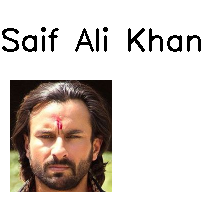

Actual Class : Shahrukh Khan


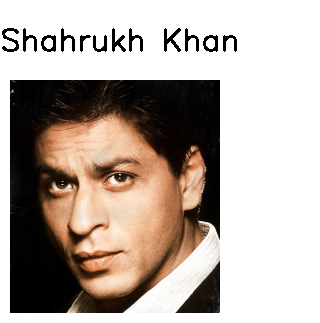

Actual Class : Shahrukh Khan


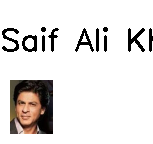

Actual Class : Saif Ali Khan


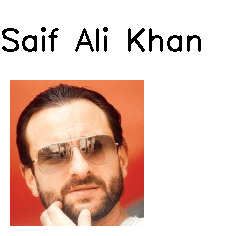

Actual Class : Shahrukh Khan


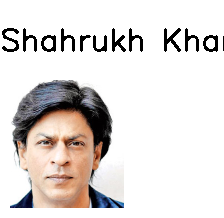

Actual Class : Shahrukh Khan


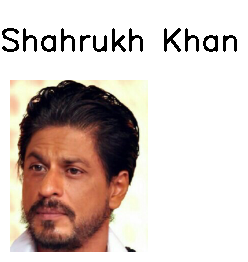

Actual Class : Saif Ali Khan


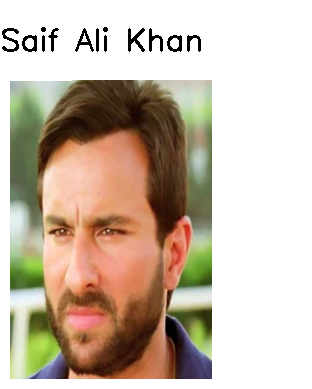

Actual Class : Shahrukh Khan


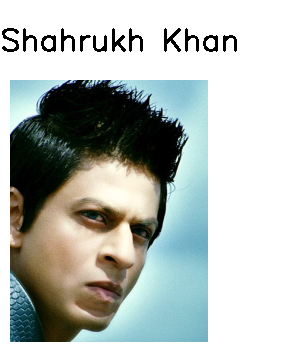

Actual Class : Saif Ali Khan


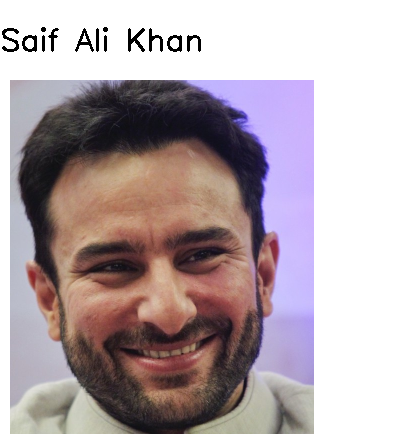

Actual Class : Saif Ali Khan


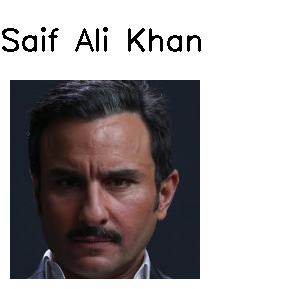

<function destroyAllWindows>

In [18]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import os
#from os import listdir
#from os.path import isfile ,isdir ,join

celebs_list = ['Shahrukh Khan','Saif Ali Khan']

celebs_dict = { 'n0':'Shahrukh Khan',
                'n1':'Saif Ali Khan'
              }

def getTestImage(path):
  class_folders = list(filter(lambda x: os.path.isdir(os.path.join(path,x)),os.listdir(path)))
  folder_index = np.random.randint(0,len(class_folders))
  random_folder_name = class_folders[folder_index]
  print('Actual Class :',celebs_dict[str(random_folder_name)])
  folder_path = path + random_folder_name
  image_files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path,file))]
  image_index = np.random.randint(0,len(image_files))
  random_image_name = image_files[image_index]
  image_path = folder_path + "/"+ random_image_name
  return(cv2.imread(image_path))

def displayTestImage(image,category):
  celeb = celebs_list[category]
  white =[255,255,255]
  display_image = cv2.copyMakeBorder(image, 80 ,10,10,100, cv2.BORDER_CONSTANT,value = white)
  cv2.putText(display_image, celeb, (0,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2)
  cv2_imshow(display_image)



for i in range(0,10):
  image1 = getTestImage('/content/drive/My Drive/dataset/val/')
  image2 = image1.copy()
  image1 = cv2.resize(image1, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_LINEAR )
  

  image2 = cv2.resize(image2, dsize = (224,224), interpolation = cv2.INTER_LINEAR)
  image2 = image2/255.
  image2 = image2.reshape(1,224,224,3)
  result = model.predict(image2, 1, verbose=0)
  result_index = int(np.argmax(result, axis = 1))

  displayTestImage(image1,result_index)
  cv2.waitKey(0)

cv2.destroyAllWindows

